# Series de tiempo en Python

In [1]:
import time
start_i = time.time()

In [2]:
import pandas as pd
import warnings
# pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_columns = 200
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

El dataset usado: ambient_temperature_system_faliure

Obtenido desde https://github.com/numenta/NABm

Links:
- https://www.kaggle.com/code/victorambonati/unsupervised-anomaly-detection/notebook

In [4]:
data = pd.read_csv(r"data/ambient_temperature_system_failure.csv")
print(data.shape)
print(data.dtypes)
data.head()

(7267, 2)
timestamp     object
value        float64
dtype: object


,timestamp,value
0,2013-07-04 00:00:00,69.880835
1,2013-07-04 01:00:00,71.220227
2,2013-07-04 02:00:00,70.877805
3,2013-07-04 03:00:00,68.959400
4,2013-07-04 04:00:00,69.283551


In [5]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
print(data.dtypes)

timestamp    datetime64[ns]
value               float64
dtype: object


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
value,7267.0,71.242433,4.247509,57.458406,68.369411,71.858493,74.430958,86.223213


In [7]:
# convertir la temperatura a C
data['value'] = (data['value'] - 32) * 5/9
data.describe()

,value
count,7267.000000
mean,21.801352
std,2.359727
min,14.143559
25%,20.205228
50%,22.143607
75%,23.572754
max,30.124007


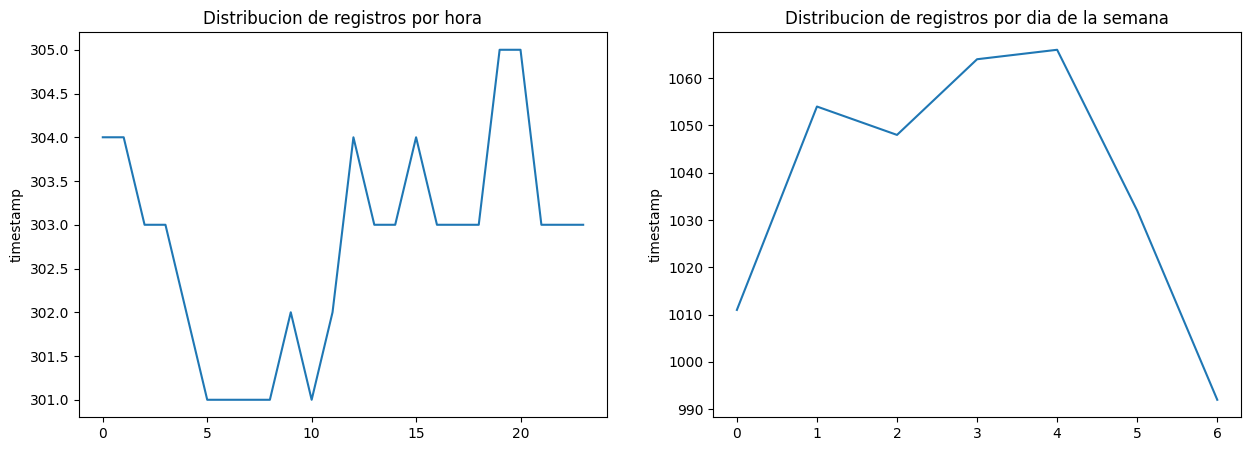

In [8]:
fig,ax = plt.subplots(1,2, figsize=(15,5))
sns.lineplot(data['timestamp'].dt.hour.value_counts().sort_index(), ax=ax[0])
sns.lineplot(data['timestamp'].dt.day_of_week.value_counts().sort_index(), ax=ax[1])
ax[0].title.set_text("Distribucion de registros por hora")
ax[1].title.set_text("Distribucion de registros por dia de la semana")
fig.subplots_adjust()
plt.show()

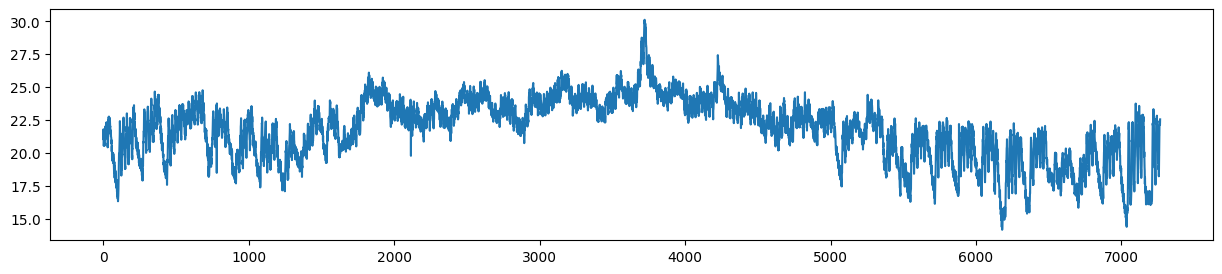

In [9]:
data['value'].plot(figsize=(15,3));

Definir el indice como el campo ***timestamp***

In [10]:
data.set_index("timestamp", inplace=True)
data.index = pd.to_datetime(data.index)
data.index

DatetimeIndex(['2013-07-04 00:00:00', '2013-07-04 01:00:00',
               '2013-07-04 02:00:00', '2013-07-04 03:00:00',
               '2013-07-04 04:00:00', '2013-07-04 05:00:00',
               '2013-07-04 06:00:00', '2013-07-04 07:00:00',
               '2013-07-04 08:00:00', '2013-07-04 09:00:00',
               ...
               '2014-05-28 06:00:00', '2014-05-28 07:00:00',
               '2014-05-28 08:00:00', '2014-05-28 09:00:00',
               '2014-05-28 10:00:00', '2014-05-28 11:00:00',
               '2014-05-28 12:00:00', '2014-05-28 13:00:00',
               '2014-05-28 14:00:00', '2014-05-28 15:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=7267, freq=None)

<AxesSubplot: xlabel='timestamp'>

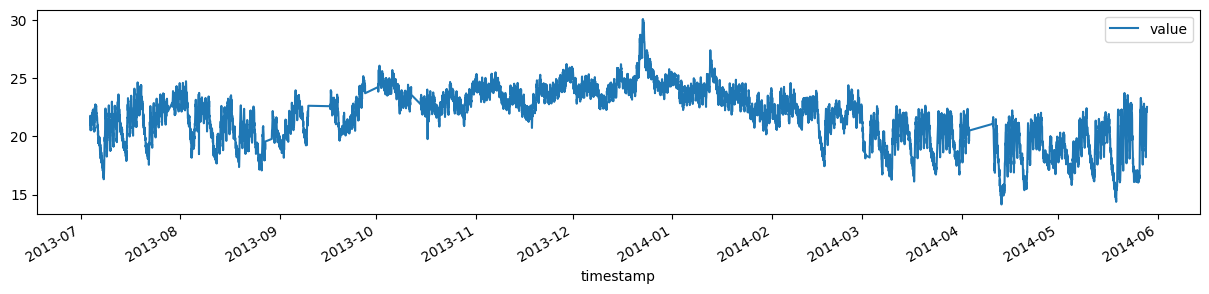

In [11]:
data.plot(figsize=(15,3))

In [12]:
print("Verificando cuanto es la diferencia en elementos que faltan al determinar la frequencia a Horas.. ", len(data.asfreq("H")), " registros sin dato =", len(data.asfreq("H"))-len(data))

Verificando cuanto es la diferencia en elementos que faltan al determinar la frequencia a Horas..  7888  registros sin dato = 621


In [13]:
# Set freq as hourly 
data = data.asfreq("H")
data.index

DatetimeIndex(['2013-07-04 00:00:00', '2013-07-04 01:00:00',
               '2013-07-04 02:00:00', '2013-07-04 03:00:00',
               '2013-07-04 04:00:00', '2013-07-04 05:00:00',
               '2013-07-04 06:00:00', '2013-07-04 07:00:00',
               '2013-07-04 08:00:00', '2013-07-04 09:00:00',
               ...
               '2014-05-28 06:00:00', '2014-05-28 07:00:00',
               '2014-05-28 08:00:00', '2014-05-28 09:00:00',
               '2014-05-28 10:00:00', '2014-05-28 11:00:00',
               '2014-05-28 12:00:00', '2014-05-28 13:00:00',
               '2014-05-28 14:00:00', '2014-05-28 15:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=7888, freq='H')

<AxesSubplot: xlabel='timestamp'>

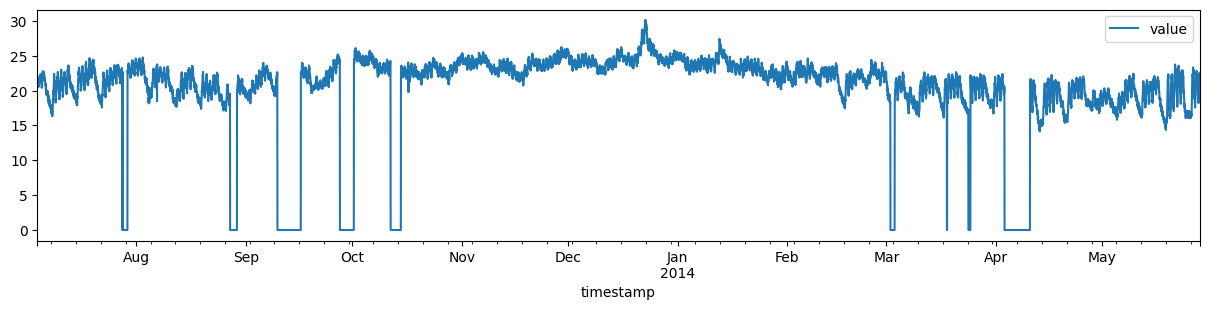

In [14]:
## there are times without measurement
data.fillna(0).plot(figsize=(15,3))

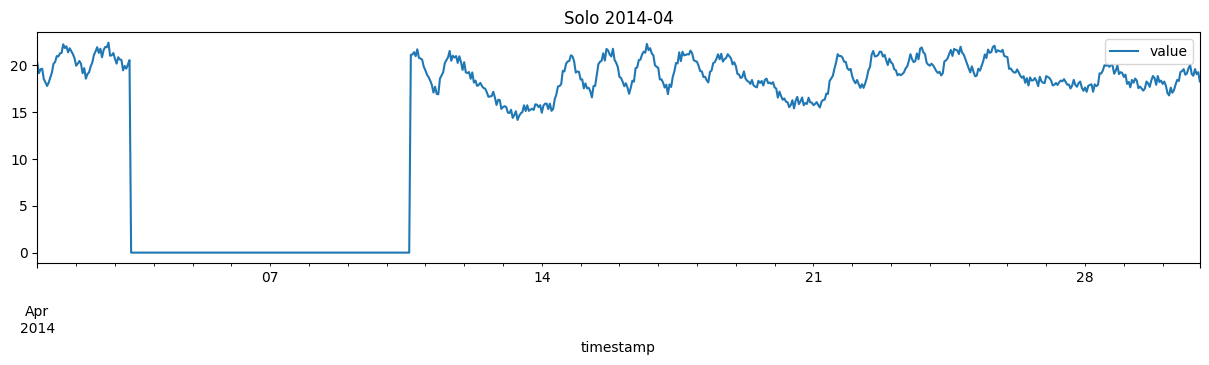

In [15]:
data["2014-04":"2014-04"].fillna(0).plot(figsize=(15,3), title="Solo 2014-04");

Frecuencia semanal

In [16]:
data1 = data.resample('W').mean()
print(data1.shape)
data1.index

(48, 1)


DatetimeIndex(['2013-07-07', '2013-07-14', '2013-07-21', '2013-07-28',
               '2013-08-04', '2013-08-11', '2013-08-18', '2013-08-25',
               '2013-09-01', '2013-09-08', '2013-09-15', '2013-09-22',
               '2013-09-29', '2013-10-06', '2013-10-13', '2013-10-20',
               '2013-10-27', '2013-11-03', '2013-11-10', '2013-11-17',
               '2013-11-24', '2013-12-01', '2013-12-08', '2013-12-15',
               '2013-12-22', '2013-12-29', '2014-01-05', '2014-01-12',
               '2014-01-19', '2014-01-26', '2014-02-02', '2014-02-09',
               '2014-02-16', '2014-02-23', '2014-03-02', '2014-03-09',
               '2014-03-16', '2014-03-23', '2014-03-30', '2014-04-06',
               '2014-04-13', '2014-04-20', '2014-04-27', '2014-05-04',
               '2014-05-11', '2014-05-18', '2014-05-25', '2014-06-01'],
              dtype='datetime64[ns]', name='timestamp', freq='W-SUN')

<AxesSubplot: xlabel='timestamp'>

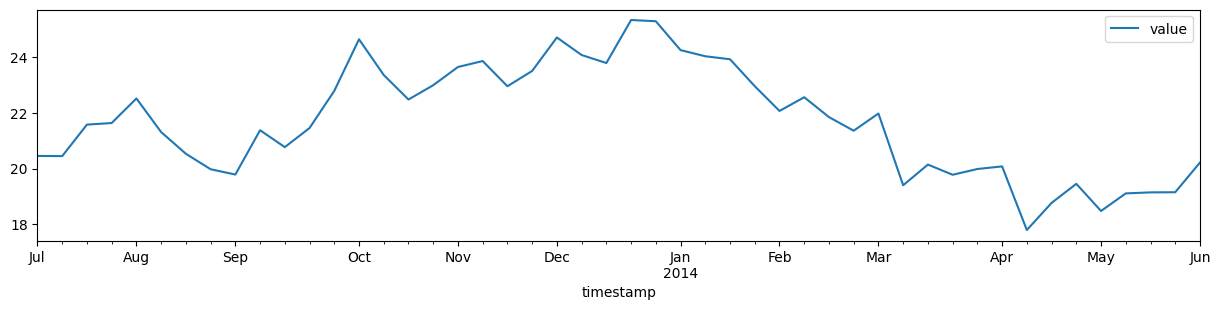

In [17]:
data1.plot(figsize=(15,3))

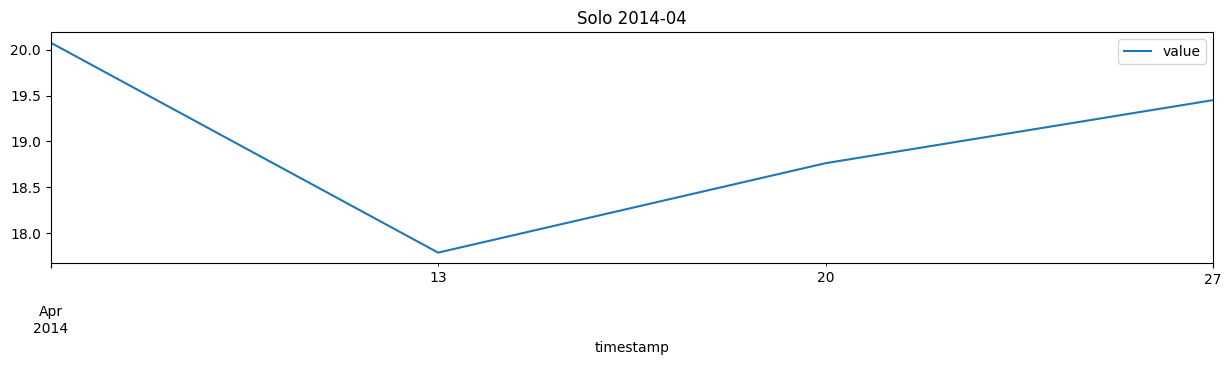

In [18]:
data1["2014-04":"2014-04"].fillna(0).plot(figsize=(15,3), title="Solo 2014-04");